In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import sqlite3
import folium 
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

In [3]:
#  creating the connection with the db created 
conn = sqlite3.connect('yelp.db')



In [4]:
tables = pd.read_sql_query("Select name from  sqlite_master where type = 'table' " ,conn)

In [5]:
tables

,name
0,business
1,review
2,users
3,tip
4,checkin


In [6]:
# exploring the data in tzbles
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5 ",conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


### Data Analyis
- Restaurant bussiness analysis
- review table is having one to many relation
  

In [7]:
# complete record 
total_business = pd.read_sql_query("select count(*) as total_count from business",conn)

restaurant_business = pd.read_sql_query("select count(*) as total_restaurants from business where categories like '%restau%'and is_open=1",conn)

print(total_business)
print(restaurant_business)


   total_count
0       150346
   total_restaurants
0              35004


# What is the descriptive stats for review count and star rating for business?

In [8]:
bus_id  = pd.read_sql_query("""select business_id,review_count from business where lower(categories) like '%restaurant%' and is_open=1""",conn)

In [9]:
bus_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [10]:
# avg , min , median  - for company distribution 

pd.read_sql_query(
    f"""
SELECT avg(review_count) as avg_review , min(review_count) as min_review , max(review_count) as max_review ,
( select review_count from business order by review_count limit 1 offset (select count(*) from business) /2) as median_review
 from business where  business_id in {tuple(bus_id['business_id'])} """
    ,conn
)

,avg_review,min_review,max_review,median_review
0,104.097789,5,7568,15


In [11]:
pd.read_sql_query(f""" select 
avg(stars) as avg_stars, min(stars) as min_stars , max(stars) as max_stars ,
                  (select stars from business order by stars limit 1 offset (select count(*) from business) /2) as median_stars 
    from business 
                  where business_id in {tuple(bus_id['business_id'])}
""",conn)

,avg_stars,min_stars,max_stars,median_stars
0,3.523969,1.0,5.0,3.5


In [12]:
# better understadning the KPIs 
pd.read_sql_query(f""" 
SELECT avg(review_count) as avg_review , min(review_count) as min_review , max(review_count) as max_review ,
( select review_count from business order by review_count limit 1 offset (select count(*) from business) /2) as median_review,

avg(stars) as avg_stars, min(stars) as min_stars , max(stars) as max_stars ,
                  (select stars from business order by stars limit 1 offset (select count(*) from business) /2) as median_stars               

 from business where  business_id in {tuple(bus_id['business_id'])}
""",conn).T

,0
avg_review,104.097789
min_review,5.000000
max_review,7568.000000
median_review,15.000000
avg_stars,3.523969
min_stars,1.000000
max_stars,5.000000
median_stars,3.500000


In [13]:
# creating the fuction for outlier when needed
# method - > IQR

def remove_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr = q3 -q1
    # setting whiskers 
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    df = df[(df[col]>=lower_limit) & (df[col] <= upper_limit)]
    return df

In [14]:
bus_id_2 = bus_id.copy()

In [15]:
bus_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [16]:
bus_id_2 = remove_outlier(bus_id_2 , 'review_count')

In [17]:
bus_id_2.shape

(31537, 2)

### nearly 4000 entries of outliers are removed

# comparing the previous query metrics with outlier treated metric

In [18]:
pd.read_sql_query(f""" 
SELECT avg(review_count) as avg_review , min(review_count) as min_review , max(review_count) as max_review ,
( select review_count from business order by review_count limit 1 offset (select count(*) from business) /2) as median_review,

avg(stars) as avg_stars, min(stars) as min_stars , max(stars) as max_stars ,
                  (select stars from business order by stars limit 1 offset (select count(*) from business) /2) as median_stars               

 from business where  business_id in {tuple(bus_id['business_id'])}
""",conn).T

,0
avg_review,104.097789
min_review,5.000000
max_review,7568.000000
median_review,15.000000
avg_stars,3.523969
min_stars,1.000000
max_stars,5.000000
median_stars,3.500000


In [19]:
pd.read_sql_query(f""" 
SELECT avg(review_count) as avg_review , min(review_count) as min_review , max(review_count) as max_review ,
( select review_count from business order by review_count limit 1 offset (select count(*) from business) /2) as median_review,

avg(stars) as avg_stars, min(stars) as min_stars , max(stars) as max_stars ,
                  (select stars from business order by stars limit 1 offset (select count(*) from business) /2) as median_stars               

 from business where  business_id in {tuple(bus_id_2['business_id'])}
""",conn).T

,0
avg_review,55.975426
min_review,5.000000
max_review,248.000000
median_review,15.000000
avg_stars,3.477281
min_stars,1.000000
max_stars,5.000000
median_stars,3.500000


## finding the business with most review_count and rating
- checking if there is any correlation btw them 
- also checking that does these metrics values translate to a bussinees suceess (in terms of user rating and )

In [20]:
# which restaurant has the highest number of reviews?
pd.read_sql_query(
    f"""
    select  name, sum(review_count) as total_reviews , avg(stars) as avg_ratings from business 
    where business_id in {tuple(bus_id_2['business_id'])}
    group by name 
    order by total_reviews desc
    limit 10
""",conn
)

,name,total_reviews,avg_ratings
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


## review count dont necessarily translate to better ratings

In [21]:
# confirming the hypothesis proposed 

pd.read_sql_query(
    f"""
    select  name, sum(review_count) as total_reviews , avg(stars) as avg_ratings from business 
    where business_id in {tuple(bus_id_2['business_id'])}
    group by name 
    order by avg_ratings desc
    limit 10
""",conn
)

,name,total_reviews,avg_ratings
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


## rating or review-count alone cant be a metric for measuring the success in the business

In [22]:
# creating the business score for quantifying the success of the business

# combining both rasting and review_count

# finding the metrics basd on indidual rating like what is the avg_rating_count of 1 star
# finding the metrics basd on indidual rating like what is the avg_rating_count of 2 star
# finding the metrics basd on indidual rating like what is the avg_rating_count of 3 star
# finding the metrics basd on indidual rating like what is the avg_rating_count of 4 star
# finding the metrics basd on indidual rating like what is the avg_rating_count of 5 star



# Does rstaurants with higher engagement tend to have hgher ratings ?
# - adding two more parameters for the score 
# - tip count and checkin count 




In [23]:
# checking for the basic star rating of the bussiness

pd.read_sql_query("""
select business_id , sum(length(date) - length(replace(date,',',''))+1) as checkin_count
                  from checkin
                  group by business_id
""",conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [24]:
pd.read_sql_query("""
select business_id ,count(*) as tip_count 
                  from tip
                  group by business_id
""",conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [25]:
# using subqueries to join tables and filter based on our outlier treated bus_id_2 

review_count_df = pd.read_sql_query(f"""
select total.avg_rating as rating ,
    avg(total.review_count) as avg_review_count,
    avg(total.checkin_count) as avg_checkin_count ,
    avg(total.tip_count) as avg_tip_count
    from 
                  (select b.business_id , sum(b.review_count) as review_count , 
                  avg(b.stars) as avg_rating ,
                  sum(length(cc.date) - length(replace(cc.date,',',''))+1) as checkin_count,
                  sum(tip.tip_count) as tip_count 
                from business b 
                left join 
                  checkin cc on b.business_id = cc.business_id 
                left join 
                  (select business_id , count(business_id) as tip_count from tip group by business_id order by tip_count ) as tip on b.business_id = tip.business_id
                  where b.business_id in {tuple(bus_id_2['business_id'])}
                  group by b.business_id) as total
                  group by total.avg_rating
""",conn)

In [26]:
review_count_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


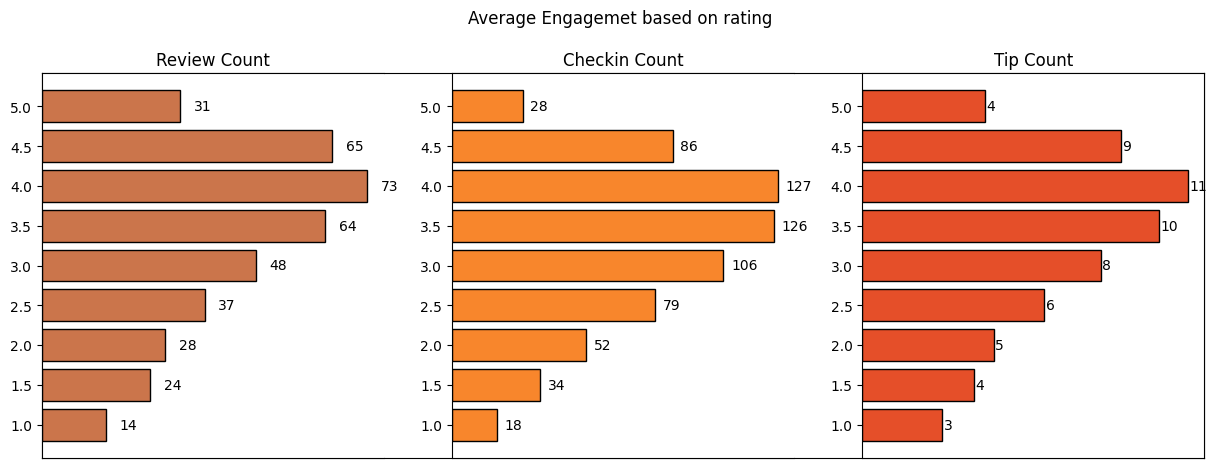

In [27]:

plt.figure(figsize=(15,5))
plt.title("Average Engagemet based on rating \n\n")
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype(str), review_count_df['avg_review_count'], edgecolor='k', color='#CB754B')
plt.gca().spines['right'].set_visible(False)

for i , value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3,i,str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype(str), review_count_df['avg_checkin_count'], edgecolor='k', color='#F8862C')
plt.gca().spines['right'].set_visible(False)

for i , value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3,i,str(round(value)), color='black', va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype(str), review_count_df['avg_tip_count'],edgecolor='k',color='#E54F29')
# plt.gca().spines['right'].set_visible(False)
for i , value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+0.05,i,str(round(value)), color='black', va='center')
plt.xticks([])
plt.show()


In [28]:
# is there any correlation in the metrics 
engagement_df = pd.read_sql_query(f"""

                  select b.business_id , sum(b.review_count) as review_count , 
                  avg(b.stars) as avg_rating ,
                  sum(length(cc.date) - length(replace(cc.date,',',''))+1) as checkin_count,
                  sum(tip.tip_count) as tip_count ,
                  (case when b.stars >=3.5 then 'high-rated' else 'low-rated' end) as category
                                  
                from business b 
                left join 
                  checkin cc on b.business_id = cc.business_id 
                left join 
                  (select business_id , count(business_id) as tip_count from tip group by business_id order by tip_count ) as tip on b.business_id = tip.business_id
                  where b.business_id in {tuple(bus_id_2['business_id'])}
                  group by b.business_id
                  
""",conn).dropna()

In [29]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

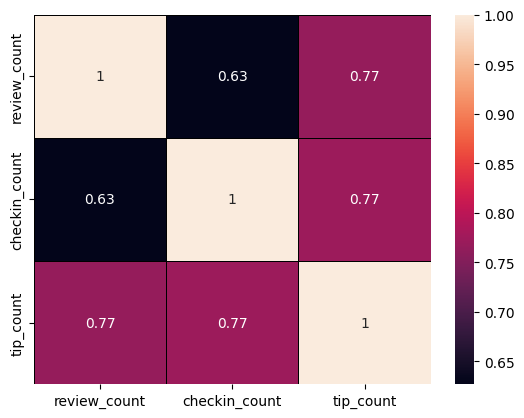

In [30]:
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(),annot=True,linewidths=0.5,linecolor='black')

<Axes: >

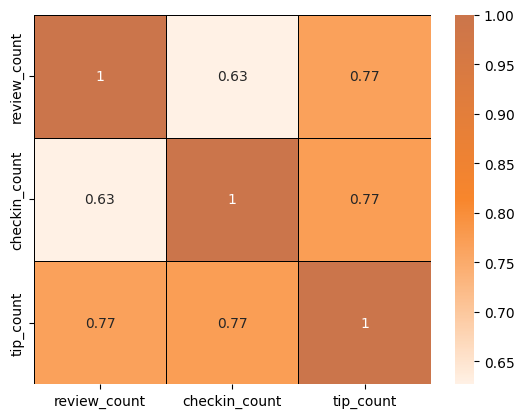

In [31]:
colors = ['#FFF1E5','#F8862C','#CB754B']
custom_map = LinearSegmentedColormap.from_list("mycmap",colors)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(), cmap=custom_map, annot=True,linewidths=0.5,linecolor='black')

In [32]:
# difference between hgh rated and low rate business?
# is there a difference in user engagemet in terms of reviews, tips , checkins 

pd.read_sql_query(
    f""" select 
    b.business_id , sum(b.review_count) as review_count ,
    avg(b.stars) as avg_rating,
    sum(length(cc.date)-length(replace(cc.date,',',''))+1) as checkin_count,
    sum(tip.tip_count) as tip_count,
    (case when b.stars >=3.5 then 'high-rated' else 'low-rated' end) as category
from 
business b 
left join 
    checkin cc on b.business_id = cc.business_id
left join 
 (select tip.business_id , count(tip.business_id) as tip_count from tip group by tip.business_id order by tip_count ) as tip on b.business_id = tip.business_id 
 where b.business_id in {tuple(bus_id_2['business_id'])}
group by b.business_id
"""
, conn).dropna()

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,high-rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,low-rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,low-rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,low-rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,low-rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,low-rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,low-rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,high-rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,high-rated


In [33]:
engagement_df.groupby('category') [['review_count','tip_count','checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
high-rated,72.291062,10.162766,122.066641
low-rated,42.123420,6.541689,88.880828


In [34]:
# creating a metric for calcualtion of success score based on avg_rating and total review count 
def cal_success_metric(df):
    success_score = []
    for index , row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count']+1 ) # weighted metric 
        success_score.append(score)
    return success_score

In [35]:
# How do the success metrics ( review_count or avg_rating) of restaurants vary across different states and cities?
city_df = pd.read_sql_query(f"""
select city , state , latitude , longitude , avg(stars) as avg_rating , sum(review_count) as review_count ,
                  count(*) as restaurant_count
                  from business 
                  where business_id in {tuple(bus_id_2['business_id'])}
                  group by state , city
                  order by review_count desc
                  limit 10
""",conn)

city_df['success_score'] = cal_success_metric(city_df)

In [36]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [37]:
# creating a base map

m = folium.Map(location = [city_df['latitude'].mean(), city_df['longitude'].mean() ], zoom_start=4)

# defining the color scale 
color_scale = folium.LinearColormap(colors=['green','yellow','#E54F29'],
                                    vmin=city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())

# adding the markers 
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color= color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']} "
        ).add_to(m)
    
m.add_child(color_scale)

## time series analysis

In [38]:
# are there any patterns in users engagement over time for successful business compared to less successful ones?
# are there any seasonal trends in the user engagement for restaurants?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year , review.review_count, tip.tip_count FROM
   (select strftime('%m-%Y', date) as month_year , count(*) as review_count 
        from review 
        where business_id in {tuple(bus_id_2['business_id'])} and stars >= 3.5
        group by month_year)  as review
    join 
    (select avg(b.stars) ,strftime('%m-%Y', date) as month_year , count(*) as tip_count
    from tip 
    join business b 
    on tip.business_id = b.business_id 
    where tip.business_id in {tuple(bus_id_2['business_id'])} and b.stars >= 3.5
    group by month_year
    order by month_year) as tip 

    on review.month_year = tip.month_year;
""",conn)


low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year , review.review_count, tip.tip_count FROM
   (select strftime('%m-%Y', date) as month_year , count(*) as review_count 
        from review 
        where business_id in {tuple(bus_id_2['business_id'])} and stars <  3.5
        group by month_year)  as review
    join 
    (select avg(b.stars) ,strftime('%m-%Y', date) as month_year , count(*) as tip_count
    from tip 
    join business b 
    on tip.business_id = b.business_id 
    where tip.business_id in {tuple(bus_id_2['business_id'])} and b.stars < 3.5
    group by month_year
    order by month_year) as tip 

    on review.month_year = tip.month_year;
""",conn)

In [39]:
high_rated_engagement


,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [40]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [41]:
time_rating = pd.read_sql_query(f"""
SELECT  strftime('%m-%Y',date) as month_year , avg(stars) as avg_rating
from review
where business_id in {tuple(bus_id_2['business_id'])}
group by month_year
order by month_year;
""",conn)

In [42]:
time_rating 

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [43]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace=True)
time_rating = time_rating[time_rating['month_year'] > '2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year',inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] >'2017']


In [44]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

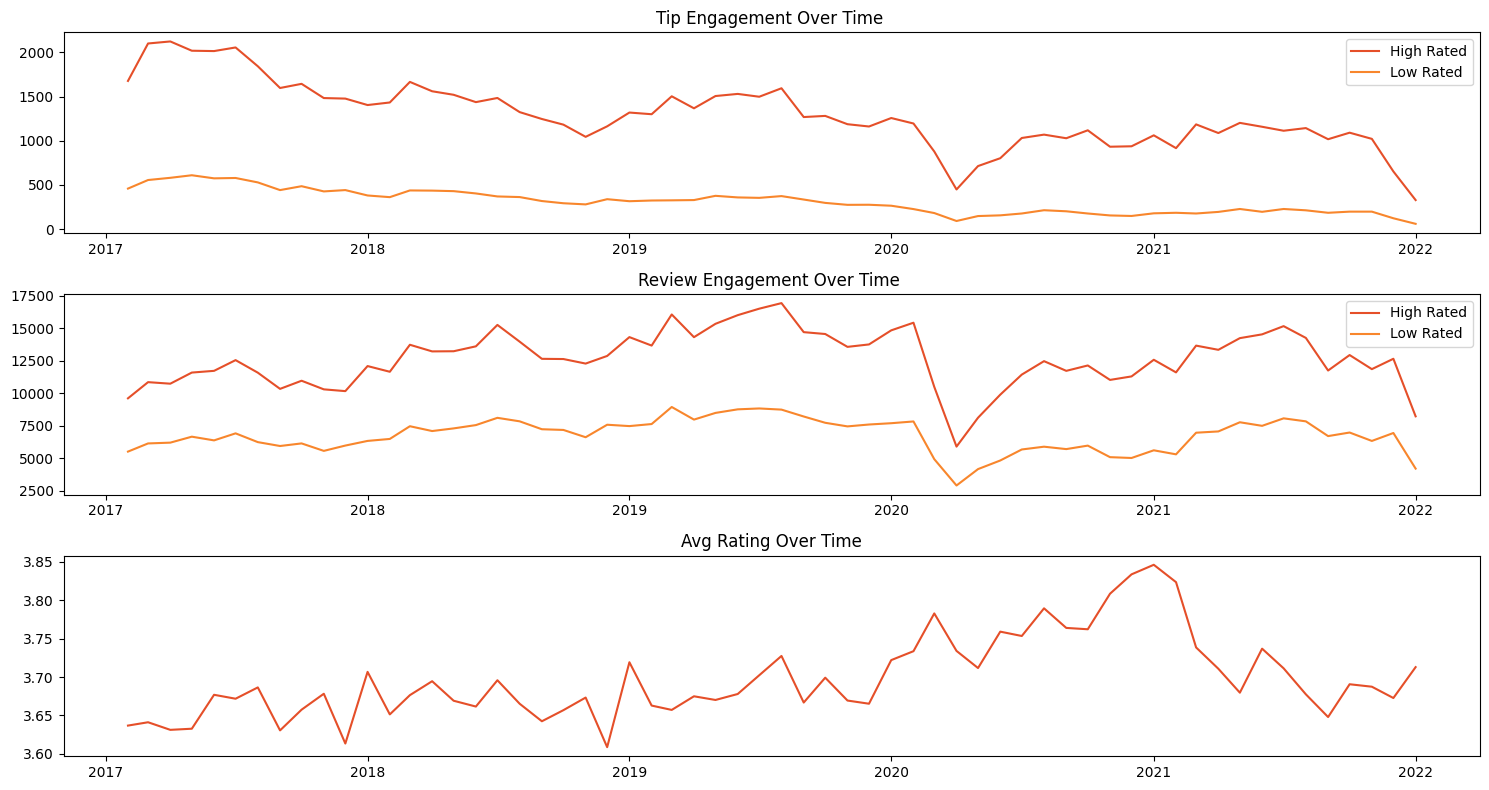

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time ')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['tip_count'],label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['tip_count'],label='Low Rated' , color= '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time ')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High Rated', color='#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'],label='Low Rated' , color='#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color='#E54F29')
plt.tight_layout()
plt.show()



In [46]:
# high rated restaurant insights based on time 
# since for time series formulation index value should be time and the data object should be in series

tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

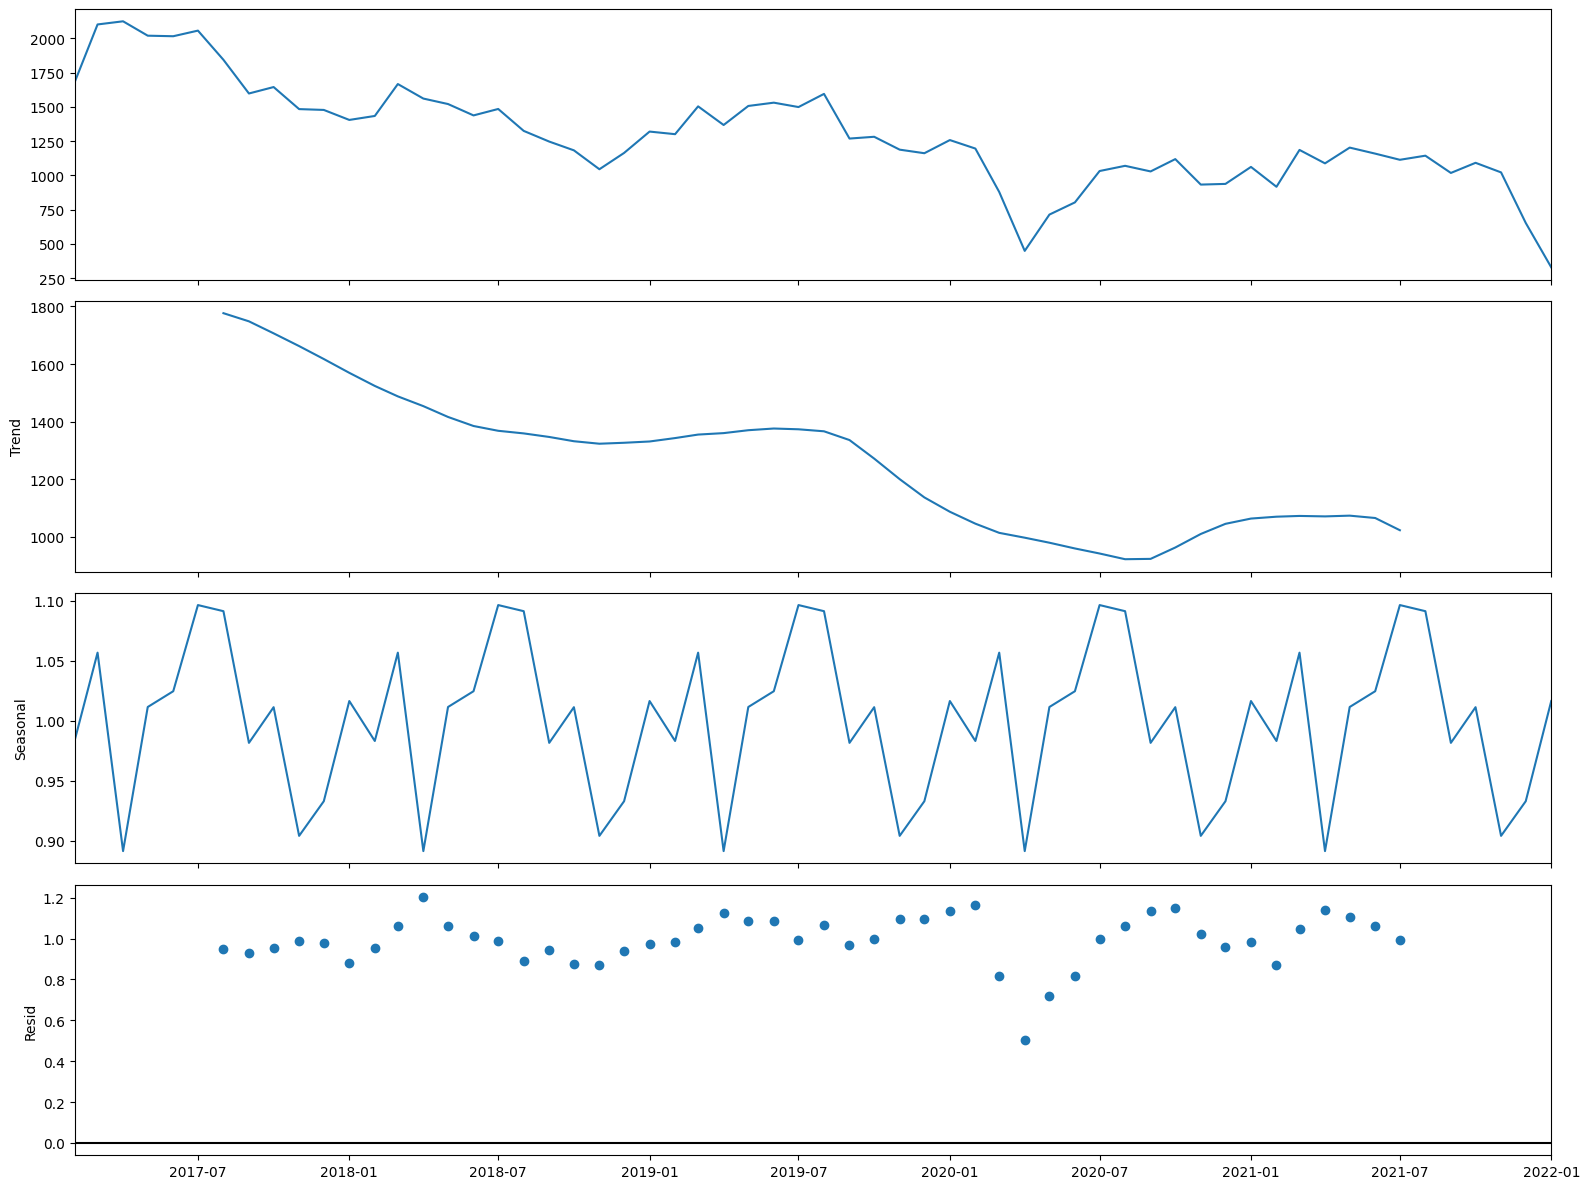

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,model='multiplicative',period=12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

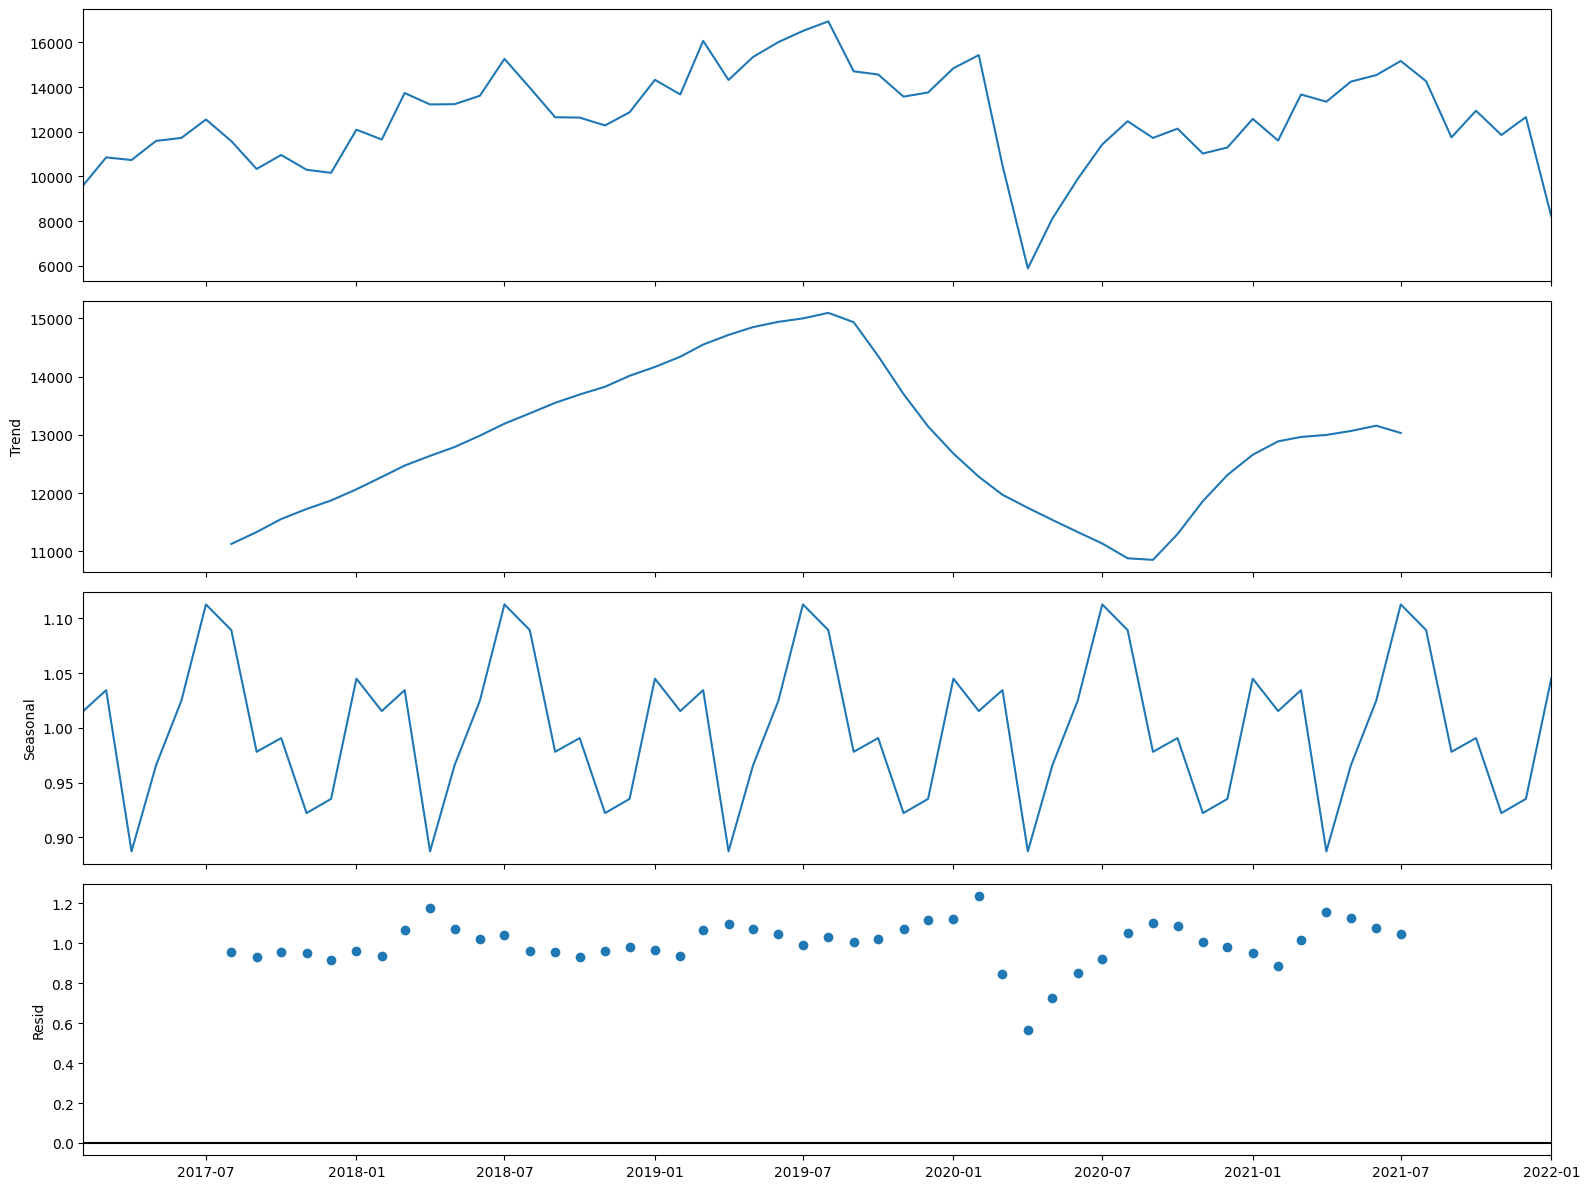

In [48]:
multiplicative_decomposition = seasonal_decompose(review_high_rated,model='multiplicative',period=12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

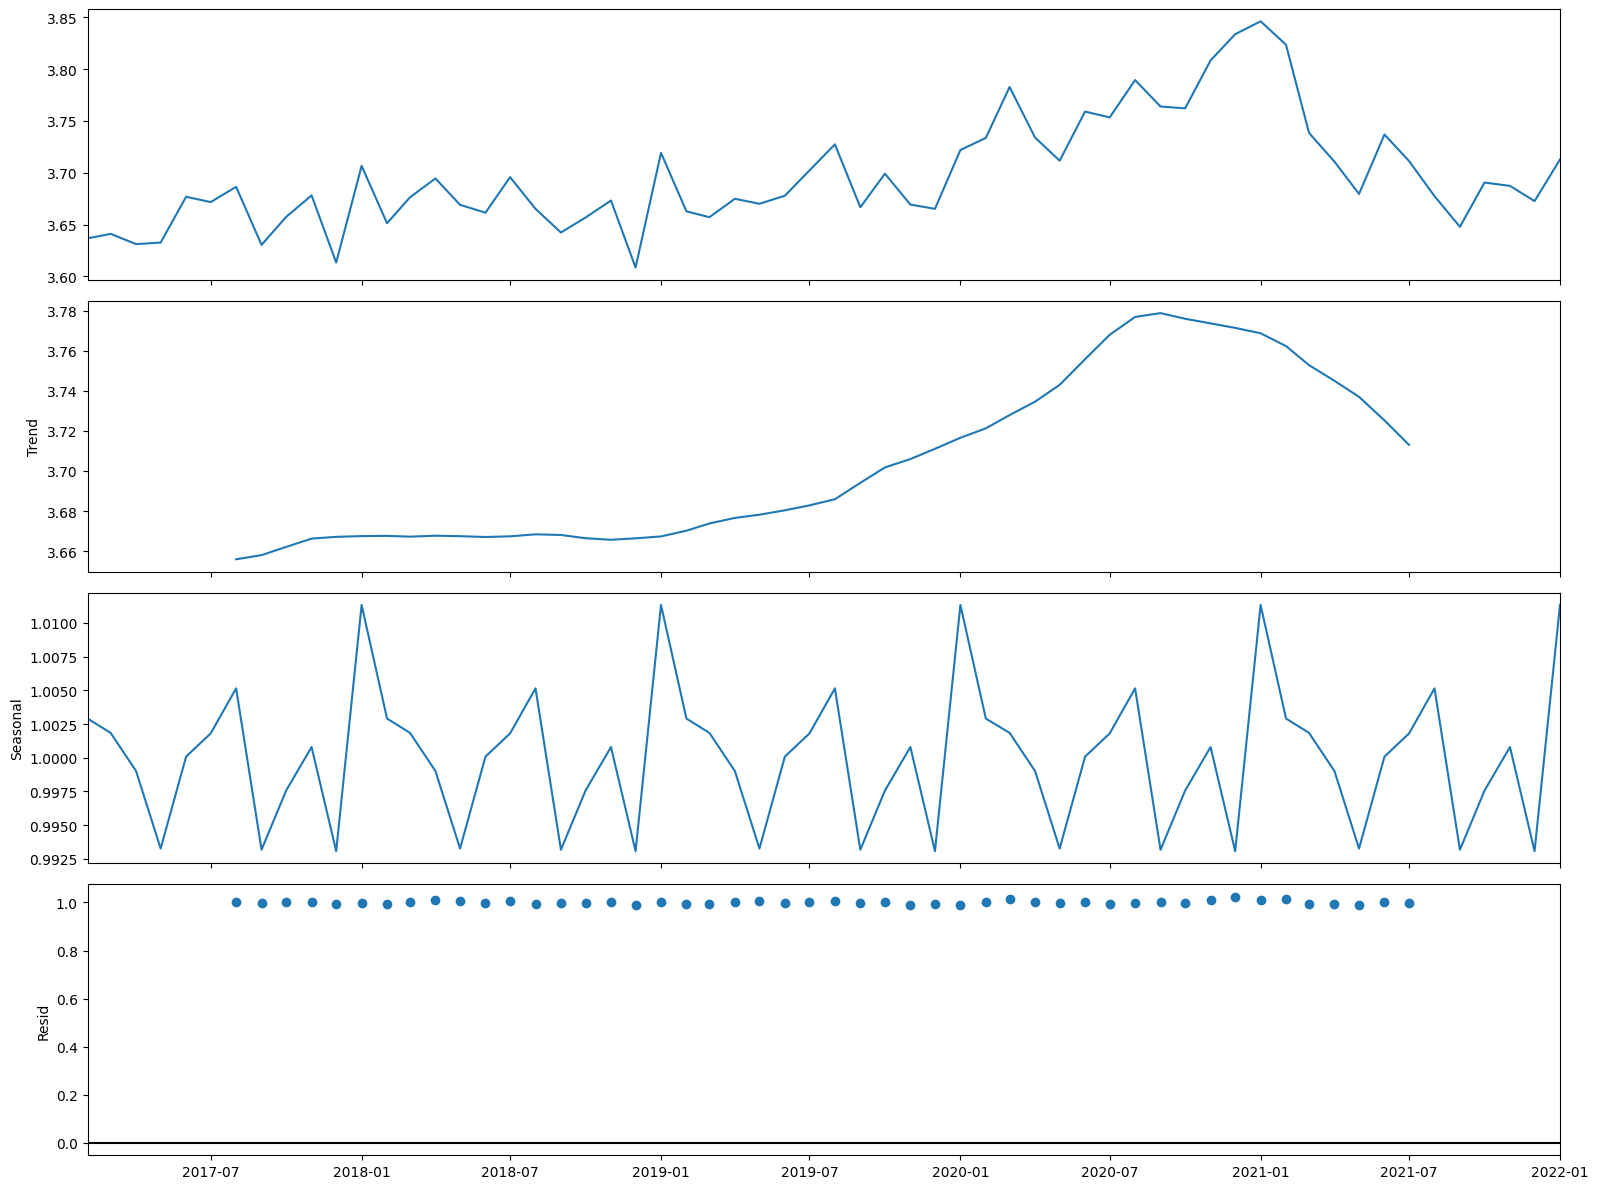

In [49]:
multiplicative_decomposition = seasonal_decompose(rating_df,model='multiplicative',period=12)

plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

In [50]:
# sentiment analysis - palceholder 

# how sentiment of review and tips (useful, funny,cool) correlated with the success metrics of restaurants 


sentiment_df = pd.read_sql_query(f"""
select b.business_id, avg(b.stars) as avg_rating , sum(b.review_count) as review_count,
sum(s.useful_count) as useful_count,
sum(s.funny_count) as funny_count,
sum(s.cool_count) as cool_count
from 
(select business_id , sum(useful) as useful_count, sum(funny) as funny_count, sum(cool) as cool_count 
from review
group by business_id) as s 
join business as b on b.business_id = s.business_id 

where b.business_id in {tuple(bus_id_2['business_id'])}
group by b.business_id
order by review_count
""",conn)


In [51]:
sentiment_df = remove_outlier(sentiment_df,'review_count')
sentiment_df = remove_outlier(sentiment_df,'useful_count')
sentiment_df = remove_outlier(sentiment_df,'funny_count')
sentiment_df = remove_outlier(sentiment_df,'cool_count')

In [52]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
29613,I2_0af3Gu4SyAq4Qdz5cFg,3.0,175,122,26,45
29627,radib3GHt_Up9-zhUjM1ew,3.5,175,128,29,21
29633,17AnbEkqAiE66YFTDYFvgw,2.5,176,110,25,25
29652,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81,13,29


In [53]:
sentiment_df['success_score'] = cal_success_metric(sentiment_df)

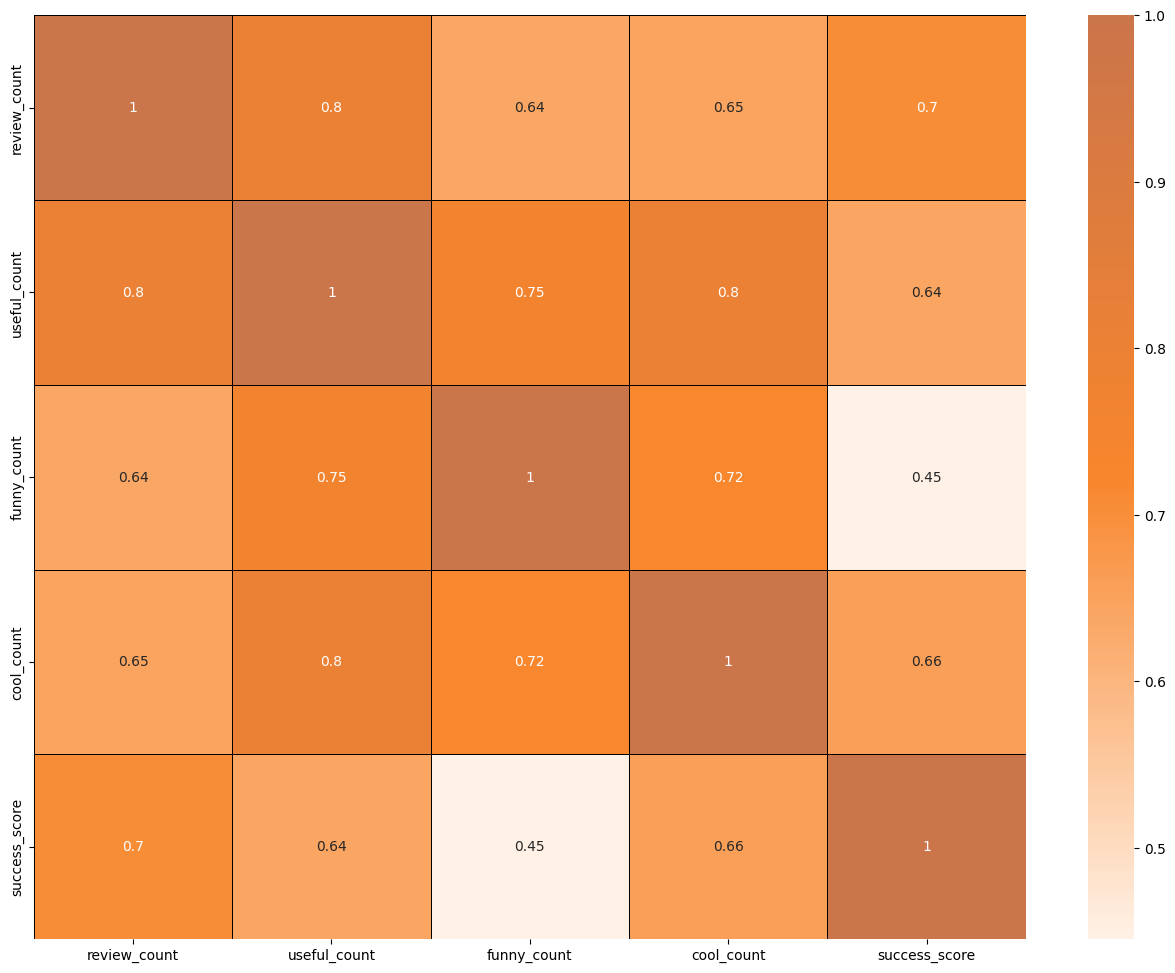

In [54]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(),cmap=custom_map, annot=True,linewidths=0.5,linecolor='black')
plt.show()

In [55]:
# success score seems to be more related to useful and cool more than funny


# now lets talk about elite user and normal user

In [56]:
# Is there any differnece in engagements between elite users and normal users

elite_df = pd.read_sql_query("""
select elite , count(*) as row_count ,
sum(review_count) as total_review_count
from 
 (select 
    case when elite = '' then 'Not Elite'
    else 'Elite'
    end as elite, u.review_count
    from users u ) as user_elite
group by elite;
""",conn)

In [57]:
elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


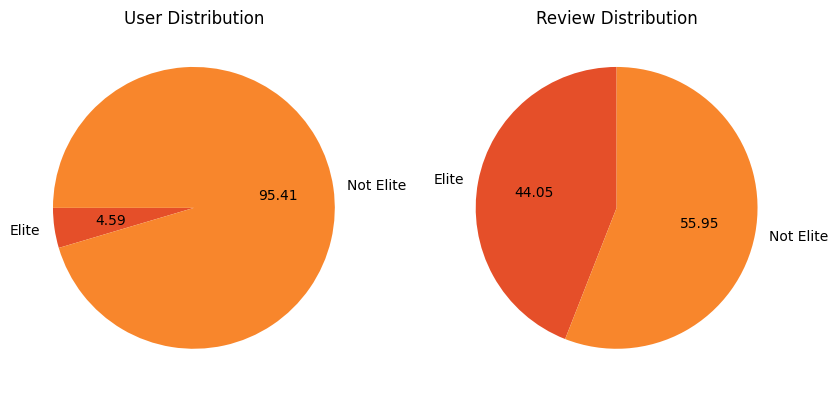

In [58]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'],labels = elite_df['elite'], autopct= '%.2f', startangle= 180, colors = ['#E54F29','#F8862C'])

plt.subplot(1,2,2)
plt.title("Review Distribution")
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'], autopct ='%.2f', startangle= 90 , colors= ['#E54F29','#F8862C'])
plt.show()

In [59]:
# busiest hours for restaurants
# based on review-engagement , tip -engagement , checkibn engagement 


review_engagement = pd.read_sql_query("""
select cast(strftime ('%H',date) as integer) as hour,
count(*) as review_count 
from review
group by hour;
""",conn)

tip_engagement = pd.read_sql_query("""
select cast(strftime ('%H',date) as integer) as hour,
count(*) as tip_count 
from tip
group by hour;
""",conn)


checkin = pd.read_sql_query("""select date from checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

In [61]:
checkin_engagement

,0
0,
0,1155092
1,935985
2,669574
3,437035
4,264905
5,152476
6,85066
7,52295
8,35589


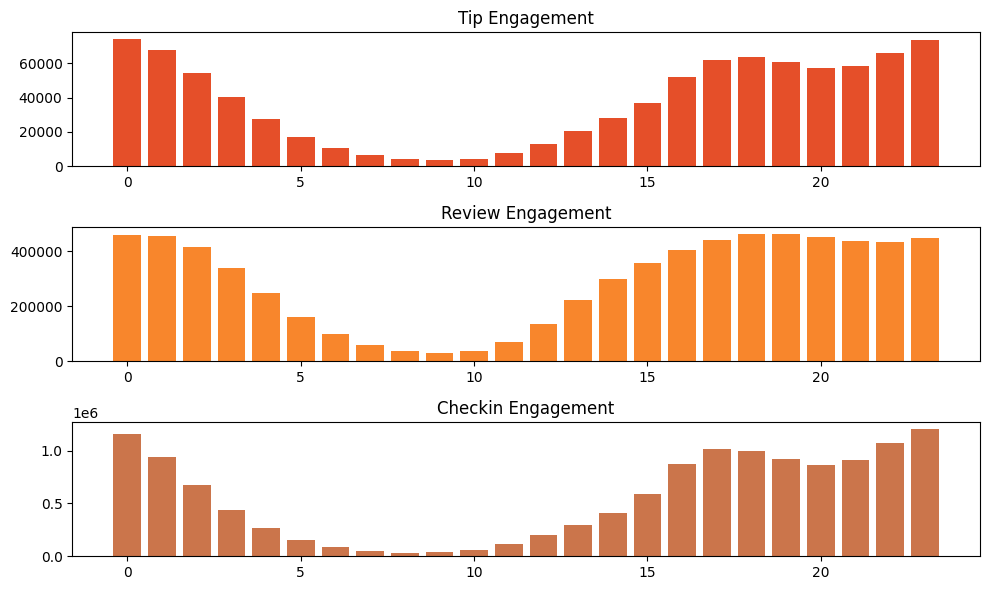

In [63]:
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#E54F29')
plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#F8862C')
plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color='#CB754B')
plt.tight_layout()
plt.show()
